In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
x = df.drop(columns=['species'])
y = df[['species']]

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [18]:
x_pre1 = num_pipe.fit_transform(x)
x_pre1

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [19]:
x_pre1 = pd.DataFrame(x_pre1,columns=cols)
x_pre1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre1,y,test_size=0.3,random_state=50)

In [24]:
xtrain.shape

(105, 4)

In [25]:
xtest.shape

(45, 4)

In [26]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
17,-0.900681,1.019004,-1.340227,-1.183812
42,-1.748856,0.328414,-1.397064,-1.315444
18,-0.173674,1.709595,-1.169714,-1.183812
146,0.553333,-1.282963,0.705921,0.922303
114,-0.052506,-0.592373,0.762758,1.580464


In [27]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
88,-0.294842,-0.131979,0.194384,0.132510
72,0.553333,-1.282963,0.649083,0.395774
20,-0.537178,0.788808,-1.169714,-1.315444
16,-0.537178,1.939791,-1.397064,-1.052180
147,0.795669,-0.131979,0.819596,1.053935


In [29]:
ytrain.head()

,species
17,setosa
42,setosa
18,setosa
146,virginica
114,virginica


In [30]:
ytest.head()

,species
88,versicolor
72,versicolor
20,setosa
16,setosa
147,virginica


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

c:\Users\Karima\Desktop\Simran\Machine_Learning\vscode_wakad\repository\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
model.score(xtrain,ytrain)

0.9714285714285714

In [35]:
model.score(xtest,ytest)

0.9777777777777777

In [36]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [38]:
ypred_tr[0:5]

array(['setosa', 'setosa', 'setosa', 'virginica', 'virginica'],
      dtype=object)

In [39]:
ypred_ts[0:5]

array(['versicolor', 'versicolor', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [40]:
ypred_probtr = model.predict_proba(xtrain)
ypred_probts = model.predict_proba(xtest)

In [41]:
ypred_probtr[0:5]

array([[9.74709002e-01, 2.52902656e-02, 7.32472426e-07],
       [9.83096786e-01, 1.69028297e-02, 3.84410606e-07],
       [9.66810821e-01, 3.31881269e-02, 1.05199822e-06],
       [2.56973265e-04, 1.58319416e-01, 8.41423610e-01],
       [1.76052873e-04, 2.46071270e-02, 9.75216820e-01]])

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [43]:
import matplotlib.pyplot as plt

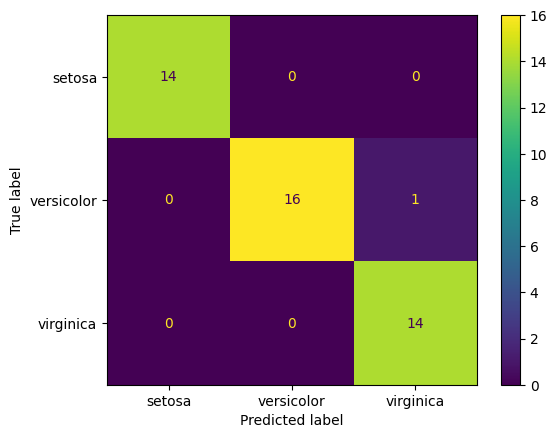

In [44]:
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [47]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [48]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [49]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [51]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [52]:
proba = model.predict_proba(xnew_pre)
proba

array([[2.37583918e-02, 8.67587286e-01, 1.08654322e-01],
       [1.47531132e-04, 5.10016596e-02, 9.48850809e-01],
       [1.28238326e-01, 8.58645897e-01, 1.31157771e-02],
       [7.55805278e-01, 2.44021348e-01, 1.73374911e-04],
       [5.73303725e-03, 2.69135119e-01, 7.25131843e-01],
       [9.55397171e-01, 4.46021056e-02, 7.23786820e-07],
       [1.78921664e-01, 7.84782703e-01, 3.62956330e-02],
       [6.78518820e-04, 1.28662253e-01, 8.70659228e-01],
       [9.82220988e-01, 1.77786909e-02, 3.20901358e-07],
       [9.14941761e-01, 8.49266517e-02, 1.31587274e-04],
       [2.31936832e-02, 8.93796245e-01, 8.30100715e-02],
       [2.99510261e-02, 9.45202230e-01, 2.48467441e-02],
       [2.96385061e-06, 1.41559100e-02, 9.85841126e-01],
       [4.69637789e-03, 6.61911754e-01, 3.33391868e-01],
       [6.10008988e-04, 4.32284271e-01, 5.67105720e-01]])

In [56]:
prob1 = []
for i in proba:
    prob1.append(i.max())

In [57]:
prob1

[0.867587285970004,
 0.9488508092599498,
 0.8586458967661483,
 0.7558052775252803,
 0.7251318432986571,
 0.9553971705961163,
 0.7847827032956955,
 0.8706592280221265,
 0.9822209881954082,
 0.9149417609849022,
 0.8937962453943339,
 0.945202229878459,
 0.9858411261312698,
 0.6619117539780063,
 0.5671057201341587]

In [59]:
xnew['preds']=preds
xnew['prob1']=prob1

In [60]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,preds,prob1
0,5.5,2.5,4.0,1.3,versicolor,0.867587
1,6.9,3.1,5.1,2.3,virginica,0.948851
2,5.1,2.5,3.0,1.1,versicolor,0.858646
3,4.4,2.9,NaN,0.2,setosa,0.755805
4,5.9,3.0,5.1,1.8,virginica,0.725132
5,5.5,3.5,1.3,0.2,setosa,0.955397
6,5.6,NaN,3.6,1.3,versicolor,0.784783
7,6.5,3.0,5.2,2.0,virginica,0.870659
8,5.3,3.7,1.5,0.2,setosa,0.982221
9,5.1,3.4,1.5,NaN,setosa,0.914942


In [61]:
xnew.to_csv('prediction.csv')